# ***1. Logistic Regression with two classes.***

### 1. Classification with logistic regression:

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes.

In [2]:
u2 = 'http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png'
from IPython.display import Image
img = Image(url=u2, width= 800)              # create the image object
img   

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

#### 1.1. Read in data and explore:

In [4]:
# Load data.
data = load_breast_cancer()

In [5]:
# Display the description.
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
# Explanatory variables.
X = data['data']
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
X.shape

(569, 30)

In [8]:
# Response variable.
# Relabel such that 0 = 'benign' and 1 = malignant.
Y = 1 - data['target']
label = list(data['target_names'])
label.reverse()
print(label)

['benign', 'malignant']


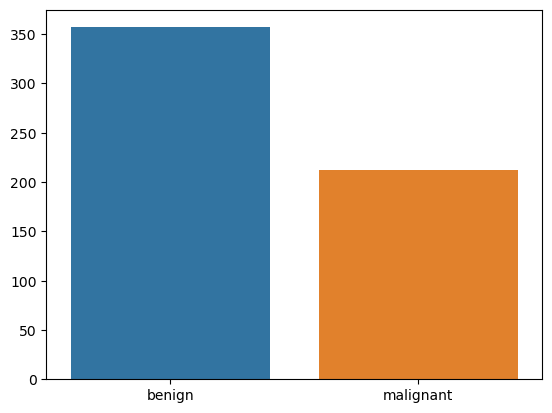

In [9]:
# Visualize the frequency table.
ser = pd.Series(Y)
table = ser.value_counts()
table = table.sort_index()                                         # Has to be sorted for correct labeling.
sns.barplot(x = label,y = table.values)
plt.show()

#### 1.2. Train and test:

In [10]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(341, 30)
(228, 30)
(341,)
(228,)


In [12]:
# Train and predict.
LL = LogisticRegression()
LL.fit(X_train,Y_train)
Y_pred_test = LL.predict(X_test)                            # Out-of-sample prediction. 

/Users/alfahwun/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Question 1 :

A - Use Linear regression on the breast cancer data set.


In [13]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

[[139   5]
 [ 12  72]]


**In the following code session, you can find how performence measurments are calculated**

In [14]:
# Accuracy, Sensitivity, Specificity and Precision using the confusion matrix.
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.925
Sensitvity  = 0.857
Specificity = 0.965
Precision   = 0.935


Question 2 : 

Use sklearn functions to find the values of sensitivity, and precision_score.

In [15]:
# Alternative way.
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
#sensitivity = ****
#precision = **
print('Accuracy    = {}'.format(np.round(accuracy,3)))
#print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
#print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.925


#### 1.3. Cutoff (threshold):

In [16]:
# Now, predict the probability of Y.
Y_pred_test_prob=LL.predict_proba(X_test)[:,1]

In [17]:
# change the cutoff at will
cutoff = 0.17                                                    # cutoff can be a value between 0 and 1.
Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int) #if the value of y_pred is > 0.7 then it belongs to class 1, malignant.
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)
print(conf_mat)

[[135   9]
 [  7  77]]


In [18]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.93
Sensitvity  = 0.917
Specificity = 0.938
Precision   = 0.895


# Question 3 ⁉ 

-  Set the value of your cutoff to be equal to 0.1,0.2,0.45 then 0.9.

-  Check the performance of your model. What do you conclude?


Question 4 : Find the meaning of ROC curve (sklearn).

In [19]:
# Calculate the TPR and FPR using a Scikit Learn function.
FPR, TPR, cutoffs = metrics.roc_curve(Y_test,Y_pred_test_prob,pos_label=1)      # positive label = 1.

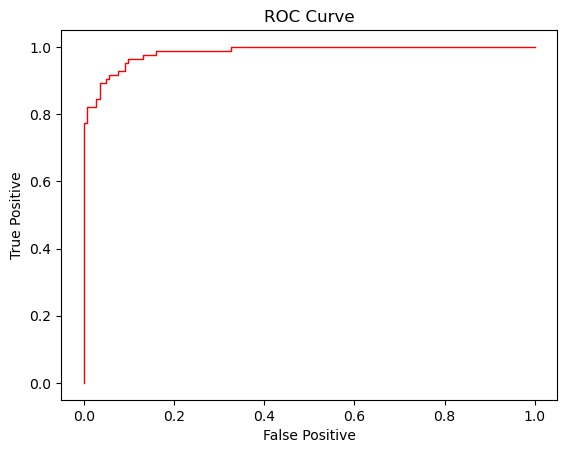

In [20]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [21]:
# AUC.
auc = metrics.roc_auc_score(Y_test,Y_pred_test_prob)
print('AUC  = {}'.format(np.round(auc,3)))

AUC  = 0.985


# ***2.Logistic Regression with three classes.***

We will use iris data set.

You can read the describtion of iris data set by using the link bellow:

https://medium.com/@kgpvijaybg/logistic-regression-on-iris-dataset-48b2ecdfb6d3

In [22]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
data = load_iris()
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#Question 1
Can you give a short description of your data.

In [23]:
load_iris().DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

# Question 2

You may notice that, in the following lines of code I've trained my model without doing a split, what do you conclude?

In [24]:
clf = LogisticRegression(max_iter=300).fit(X, y)
clf.predict(X[:8, :])

array([0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
clf.predict_proba(X[:2, :])
clf.score(X, y)

0.9733333333333334

#Question 3 
Let's do some EDA (Exploratory Data Analysis)

In [26]:
#show the frequency table of your target variable.
y_plot = pd.DataFrame(columns=['total'], data=pd.DataFrame(y).value_counts()).reset_index()
y_plot=y_plot.rename(columns={0:'label'})
y_plot

,label,total
0,0,50
1,1,50
2,2,50


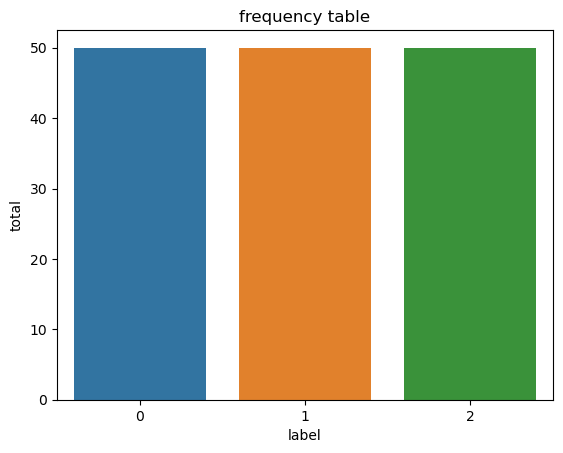

In [27]:
#Plot the frequency table.
sns.barplot(x =y_plot['label'] , y = y_plot['total'])
plt.title('frequency table')
plt.show()

#***3. Logistic Regression with titanic dataset.***

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing


The data and explanation can be found [here](https://www.kaggle.com/c/titanic/data).

In [29]:
df = pd.read_csv('/Users/alfahwun/Downloads/titanic.csv', sep=";",header='infer')

In [30]:
#Display the shape
df.shape

(891, 12)

In [31]:
#Display the first 3 elements.
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S


#### 3.1. Missing value processing: 

In [32]:
# Check for the missing values.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# Fill the missing values in the Age variable.
# if it is a Mr replace with 30, else replace with 10.
df.Age = df.Age.fillna(df.Sex.apply(lambda x:30 if 'male' else 10))

In [34]:
# We will drop some columns.
#['PassengerId','Name','Ticket','Fare','Cabin']
df = df.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)

In [35]:
# Delete the rest of missing values.
# use dropna(axis=0)
df = df.dropna(axis=0)

In [36]:
#check the new shape of your dataset
df.shape

(889, 7)

#### 3.2. Exploratory data analysis:

In [37]:
df.Survived= df.Survived.map({'No':'0','Yes':'1'})

In [38]:
df.Survived.value_counts().index.values

array(['0', '1'], dtype=object)

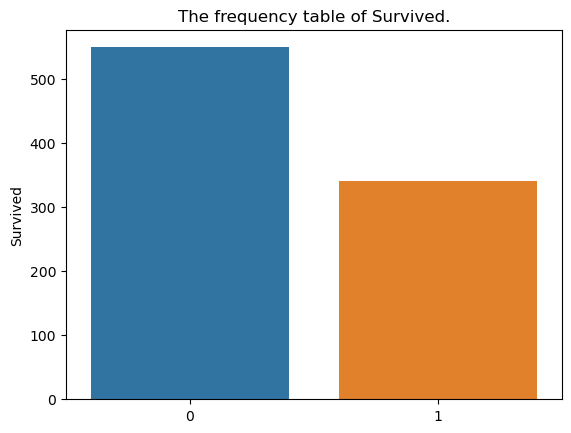

In [39]:
# The frequency table of Survived.
sns.barplot(x=[0,1],y=df.Survived.value_counts())
plt.title('The frequency table of Survived.')
plt.show()

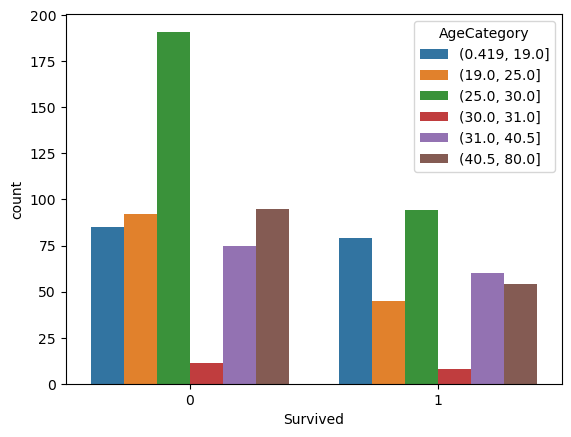

In [53]:
# Survival rate by Age category.
cutoff = 6
df['AgeCategory'] = pd.qcut(df.Age,cutoff)                   # Using quantiles cut into 4 intervals.
sns.countplot(x=df['Survived'],hue=df['AgeCategory'])
plt.show()

In [54]:
# Convert into dummy variables and then remove the original variables.
df = pd.get_dummies(df.AgeCategory, drop_first=True,prefix='Age').join(df.drop(columns=['Age','AgeCategory']))
df = pd.get_dummies(df.Pclass, drop_first=True,prefix='Pclass').join(df.drop(columns=['Pclass']))
df = pd.get_dummies(df.SibSp, drop_first=True,prefix='SibSp').join(df.drop(columns=['SibSp']))
df = pd.get_dummies(df.Parch, drop_first=True,prefix='Parch').join(df.drop(columns=['Parch']))
df = pd.get_dummies(df.Sex, drop_first=True,prefix='Sex').join(df.drop(columns=['Sex']))
df = pd.get_dummies(df.Embarked, drop_first=True,prefix='Embarked').join(df.drop(columns=['Embarked']))
df.head(5)

,Embarked_Q,Embarked_S,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,...,SibSp_5,SibSp_8,Pclass_2,Pclass_3,"Age_(19.0, 25.0]","Age_(25.0, 30.0]","Age_(30.0, 31.0]","Age_(31.0, 40.5]","Age_(40.5, 80.0]",Survived
0,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [61]:
# Save to an external file.
df.to_csv('titanic_encoded.csv',index=None)

In [72]:
#Now split your model into training and testing
#Use Logistic Regression
#Fit your model
#Check the performence of your model
x=df.drop("Survived",axis=1)
target=df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(x, target, test_size=0.4, random_state=123)
LL = LogisticRegression()
LL.fit(X_train,Y_train)
Y_pred_test = LL.predict(X_test)
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.

In [73]:
accuracy

0.8061797752808989